# Aggregating Instances: Aggregate and Histogram

We assume that you have [generated a SDK](generation.html) for the `WindTurbine` model and have a client ready to go.

`pygen` automatically generates an aggregate and a histogram method for the properties in the views.

In [1]:
import warnings

warnings.filterwarnings("ignore")
# This is just to enable improting the generated SDK from the examples folder in the pygen repository
import sys  # noqa: E402

from tests.constants import REPO_ROOT  # noqa: E402

sys.path.append(str(REPO_ROOT / "examples"))

In [2]:
from wind_turbine import WindTurbineClient

In [3]:
pygen = WindTurbineClient.from_toml("config.toml")

In [5]:
result = pygen.generating_unit.aggregate("avg", property="capacity")
result

[AvgValue(property='capacity', value=6.857142857142857)]

The `aggregate`methods combines all the aggrgagations and properties pased in

In [7]:
result = pygen.wind_turbine.aggregate(
    "count",
    property=["name", "windfarm", "capacity"],
)
result

[CountValue(property='capacity', value=5),
 CountValue(property='windfarm', value=5),
 CountValue(property='name', value=5)]

Typically, you have to specify which properties you want to aggregate on, however, for count you can skip the properties and pygen will just take the first property it finds.

In [8]:
result = pygen.generating_unit.aggregate("count")
result

[CountValue(property='externalId', value=7)]

You can also group by when you aggregate

In [9]:
result = pygen.wind_turbine.aggregate("avg", property="capacity", group_by="windfarm")
result

,aggregates,group
0,"[{'aggregate': 'avg', 'property': 'capacity', ...",{'windfarm': 'Hornsea 1'}


In [10]:
result[0].group, result[0].aggregates

({'windfarm': 'Hornsea 1'}, [AvgValue(property='capacity', value=7.0)])

In addition, we have `histogram` aggregation on a separate method

In [11]:
result = pygen.sensor_position.histogram("position", interval=5.0)
result

HistogramValue(property='position', interval=5.0, buckets=[])

In [30]:
import matplotlib.pyplot as plt

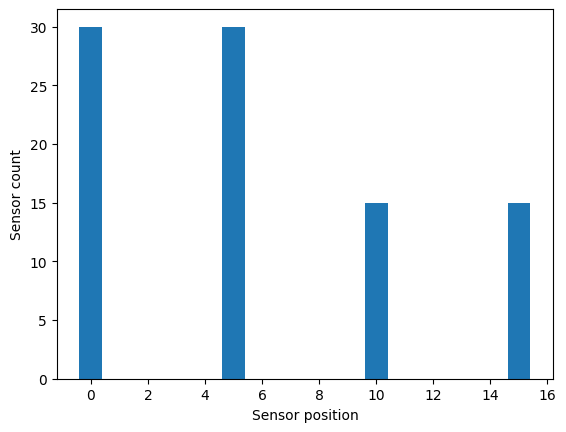

In [31]:
plt.bar([b.start for b in result.buckets], [b.count for b in result.buckets])
plt.xlabel("Sensor position")
plt.ylabel("Sensor count");

Next section: [Querying](querying.html)